[*********************100%%**********************]  1 of 1 completed

Note: you may need to restart the kernel to use updated packages.


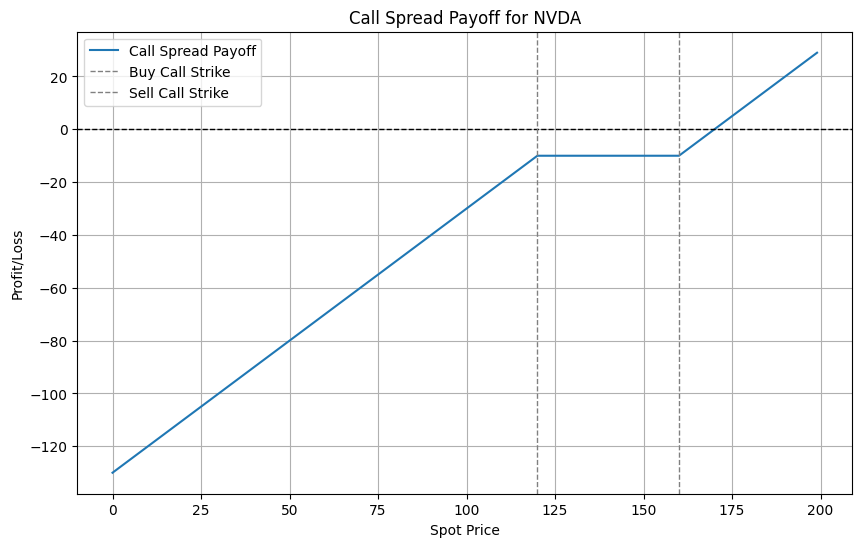

Current Spot Price: 23.22
Potential Profit/Loss at Current Spot Price: -106.78


In [2]:
%pip install yfinance

import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Define the call spread payoff function
def call_spread_payoff(spot_price, strike_price_buy, strike_price_sell, premium):
    buy_call_payoff = np.maximum(0, spot_price - strike_price_buy)
    sell_call_payoff = np.minimum(0, spot_price - strike_price_sell)
    return buy_call_payoff + sell_call_payoff + premium

# Parameters
stock_ticker = 'NVDA'
strike_price_buy = 160
strike_price_sell = 120
premium = -10  # Negative since we are paying for the spread
spot_price_range = np.arange(0, 200, 1)

# Fetch historical data
stock_data = yf.download(stock_ticker, start='2023-01-01', end='2023-03-01')
spot_price = stock_data['Close'].iloc[-1]

# Calculate payoffs
payoffs = call_spread_payoff(spot_price_range, strike_price_buy, strike_price_sell, premium)

# Plot the payoff graph
plt.figure(figsize=(10, 6))
plt.plot(spot_price_range, payoffs, label='Call Spread Payoff')
plt.axhline(0, color='black', lw=1, ls='--')
plt.axvline(strike_price_buy, color='grey', lw=1, ls='--', label='Buy Call Strike')
plt.axvline(strike_price_sell, color='grey', lw=1, ls='--', label='Sell Call Strike')
plt.xlabel('Spot Price')
plt.ylabel('Profit/Loss')
plt.title(f'Call Spread Payoff for {stock_ticker}')
plt.legend()
plt.grid(True)
plt.show()

# Print the current spot price and potential profit/loss
print(f"Current Spot Price: {spot_price:.2f}")
print(f"Potential Profit/Loss at Current Spot Price: {call_spread_payoff(spot_price, strike_price_buy, strike_price_sell, premium):.2f}")

